# Solution to the Riemann problem for two-phase flow in porous media (generalized Buckley-Leverett model)


\begin{eqnarray}
m_{1,t} + \nabla \cdot \left( \mathbf f_1 - \mathbf{a}_{1,1} \nabla \phi_1 \right) &= 0 \\\
\nabla \cdot \left( \mathbf f_2 - \mathbf{a}_{2,1} \nabla \phi_1 - \mathbf{a}_{2,2} \nabla \phi_2 \right)  &= 0 \\\
\end{eqnarray}


\begin{eqnarray}
m_{1} &=& \omega \rho_w s_w \\\
f_{1} &=& f_w q_t + \mathbf{K} \lambda_w f_n (b \rho_n - \rho_w) \nabla z \\\
f_{2} &=& \mathbf{K} \lambda_t \rho_t \nabla z \\\
a_{1,1} &=& -\mathbf{K} \lambda_w f_n \\\
a_{2,1} &=& \mathbf{K} \lambda_n \\\
a_{2,2} &=& \mathbf{K} \lambda_t \\\
\phi_1 &=& \psi_c(s_w) \\\
\phi_2 &=& \psi_w \\\
u_1 &=& s_w \\\
u_2 &=& \psi_w \\\
\end{eqnarray}

These coefficients are complex nonlinear functions of the wetting phase saturation, $s_w$, and wetting phase pressure head $\psi_w$. There are several closure families of closure relations. We will use a family that combines the work of R. van Genuchten and Y. Mualem.

# Import the constitutive relations from a module

In [2]:
%matplotlib inline
from pylab import *
from proteus.AnalyticalSolutions import Buckley_Leverett_RiemannSoln
from proteus.TwophaseDarcyCoefficients import TwophaseDarcy_split_saturation,TwophaseDarcy_split_pressure
coefficients = TwophaseDarcy_split_saturation(
    g=[-9.8],            # gravitational acceleration (9.8 m/s^2)
    rhow = 997.0,        # density wetting      (Water 997 kg/m^3)
    rhon = 1.205,        # density nonwetting   (Air 1.205 kg/m^3)
    muw  = 1.002e-3,     # viscosity wetting    (Water 1.002e-3 kg/m s)
    mun  = 1.81e-5,      # viscosity nonwetting (Air 1.81e-5 kg/m s)
    psk_model = 'VGM',
    sd = False)
flowCoefficients = TwophaseDarcy_split_pressure(
    g=[-9.8],            # gravitational acceleration (9.8 m/s^2)
    rhow = 997.0,        # density wetting      (Water 997 kg/m^3)
    rhon = 1.205,        # density nonwetting   (Air 1.205 kg/m^3)
    muw  = 1.002e-3,     # viscosity wetting    (Water 1.002e-3 kg/m s)
    mun  = 1.81e-5,      # viscosity nonwetting (Air 1.81e-5 kg/m s)
    psk_model = 'VGM',
    sd = False)
coefficients.q_q_t = array([[0.0]]) #total flow -- assume zero for now, comes from the flow solve in general
coefficients.q_psiw = array([0.0])  #wetting phase pressure head -- assume zero for now, comes from the flow solve in general

# Plot the coefficents of the PDE

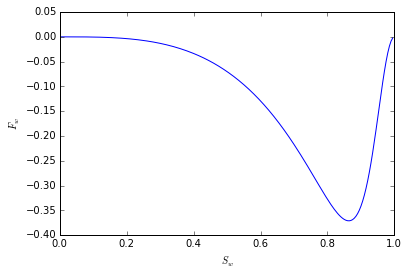

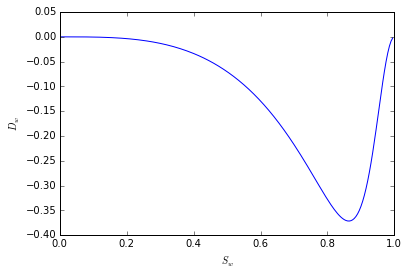

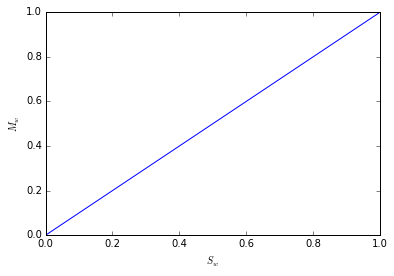

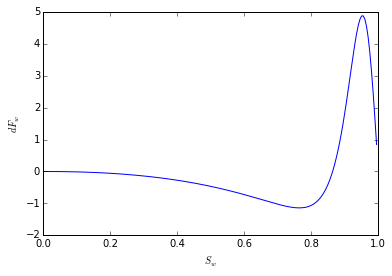

In [4]:
rs = Buckley_Leverett_RiemannSoln(coefficients,uLeft=0.0,uRight=1.0,t0=0.0,x0=0.5,T=1.0e-8,ftol=1.0e-8,useShallowCopyCoef=True)
c = rs.riemF.c
X = arange(0.0,1.0,0.005)#[0.0,0.01,1.0]
U = X.copy()
F = X.copy()
dF = X.copy()
D = X.copy()
M = X.copy()
t = 0.0
dt = 0.01
for i,u in enumerate(U):
    rs.riemF.c[('u',0)][0]=u
    coefficients.evaluate(t,rs.riemF.c)
    F[i] = rs.riemF.c[('f',0)]
    dF[i] = rs.riemF.c[('df',0,0)]
    D[i] = rs.riemF.c[('a',0,0)]
    M[i] = rs.riemF.c[('m',0)]
#subplots(nrows=1, ncols=3, sharex=True, sharey=False, squeeze=False)
#subplot(311)
#figsize(6,6)
plot(U,F)
xlabel("$S_w$")
ylabel("$F_w$")
figure()
#subplot(312)
plot(U,D)
xlabel("$S_w$")
ylabel("$D_w$")
figure()
#subplot(313)
plot(U,M)
xlabel("$S_w$")
ylabel("$M_w$")
figure()
plot(U,dF)
xlabel("$S_w$")
ylabel("$dF_w$")

# Build an animation for the solution of the Riemann problem

/home/cekees/proteus/linux2/lib/python2.7/site-packages/matplotlib/animation.py:727: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


RuntimeError: Error creating movie, return code: 1 Try running with --verbose-debug

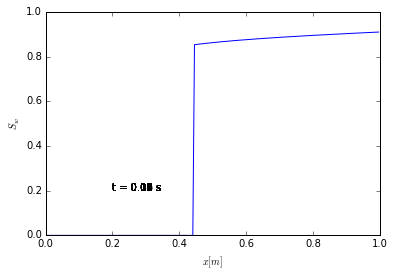

In [7]:
from matplotlib.animation import FuncAnimation
from IPython.core.display import HTML
fig1 = figure()
for i,x in enumerate(X):
    U[i]=rs.uOfXT([x],t)
sol, = plot(X,U)
sol.set_xdata(X)
def step(t):
    for i,x in enumerate(X):
        U[i]=rs.uOfXT([x],t)
    sol.set_ydata(U)
    xlabel('$x[m]$')
    ylabel('$S_w$')
    text(0.2,0.2,"t = %2.2f s" % t)
T = [i*dt for i in range(20)]
anim = FuncAnimation(fig1, step,T, interval=10)
#anim.save('rs.m4v', fps=5, codec='m4v', clear_temp=True, frame_prefix='_tmp')
#data_uri_m4v = open("rs.m4v", "rb").read().encode("base64").replace("\n", "")
#anim.save('rs.mov', fps=5, codec='mov', clear_temp=True, frame_prefix='_tmp')
#data_uri_mov = open("rs.mov", "rb").read().encode("base64").replace("\n", "")
anim.save('rs.mp4', fps=5, codec='mp4')
data_uri_mp4 = open("rs.mp4", "rb").read().encode("base64").replace("\n", "")
#anim.save('rs.mpeg', fps=5, codec='mpeg', clear_temp=True, frame_prefix='_tmp')
#data_uri_mpeg = open("rs.mpeg", "rb").read().encode("base64").replace("\n", "")
#video_tag = """<video controls ">
#<source type = "video/x-m4v" src="data:video/x-m4v;base64,{m4v}"/>
#<source type = "video/quicktime" src="data:video/quicktime;base64,{mov}"/>
#<source type = "video/mp4" src="data:video/mp4;base64,{mp4}"/>
#<source type = "video/mpeg" src="data:video/mpeg;base64,{mpeg}"/>
#Your  browser does not support the video tag
#</video>""".format(m4v=data_uri_m4v,
#                   mov=data_uri_mov,
#                   mp4=data_uri_mp4,
#                   mpeg=data_uri_mpeg)
video_tag = """<video controls>
<source src="data:video/mp4;base64,{mp4}"/>
Your browser does not support the video tag
</video>""".format(mp4=data_uri_mp4)
plt.close(fig1)
HTML(data=video_tag)

# Find the value of the sonic point

In [4]:
from proteus.ObjectiveFunctions import ObjectiveFunction_base
from proteus.Optimizers import fminbound
from scipy.optimize import bisect
class Fobj(ObjectiveFunction_base):
    def __init__(self,LHS_x,RHS_x):
    	ObjectiveFunction_base.__init__(self,LHS_x,RHS_x)
    def getResidual(self,x):
        c[('u',0)][0] = x
        coefficients.evaluate(0.0,c)
        return float(c[('f',0)][0])

fobj = Fobj(0.0,1.0)
optimizer = fminbound(fobj,1.0e-8)
a = optimizer.solve(0.9)
sonic = a

ImportError: No module named scipy.optimize

# Find the inflection points of the flux

In [ ]:
class Fpobj(ObjectiveFunction_base):
    def __init__(self,LHS_x,RHS_x,s=1.0):
    	ObjectiveFunction_base.__init__(self,LHS_x,RHS_x)
        self.s=s
    def getResidual(self,x):
        c[('u',0)][0] = x
        coefficients.evaluate(0.0,c)
        return float(self.s*c[('df',0,0)][0])

fobj = Fpobj(0.0,a[0])
optimizer = fminbound(fobj,1.0e-9)
inflect_0 = optimizer.solve(0.0)
c[('u',0)][0] = inflect_0[0]
coefficients.evaluate(0.0,c)
inflect_0 = (inflect_0[0],float(c[('f',0)][0]))
df_inflect_0 = c[('df',0,0)][0]
fobj = Fpobj(a[0],1.0,s=-1.0)
optimizer = fminbound(fobj,1.0e-9)
inflect_1 = optimizer.solve(1.0)
c[('u',0)][0] = inflect_1[0]
coefficients.evaluate(0.0,c)
inflect_1 = (inflect_1[0],float(c[('f',0)][0]))
df_inflect_1 = c[('df',0,0)][0]

# Find the intermediate states for the shocks

In [ ]:
c[('u',0)][0] = 0.0
coefficients.evaluate(0.0,c)
f0 = float(c[('f',0)][0])
c[('u',0)][0] = 1.0
coefficients.evaluate(0.0,c)
f1 = float(c[('f',0)][0])

def F_tangent_0(x):
    c[('u',0)][0] = x
    coefficients.evaluate(0.0,c)
    df = float(c[('df',0,0)][0])
    f = float(c[('f',0)][0])
    Df = float((f - f0)/(x - 0.0))
    return Df - df
S_0s = bisect(F_tangent_0,inflect_0[0],a[0])
F_0s = float(c[('f',0)][0])
def F_tangent_1(x):
    c[('u',0)][0] = x
    coefficients.evaluate(0.0,c)
    df = float(c[('df',0,0)][0])
    f = float(c[('f',0)][0])
    Df = float((f - f1)/(x - 1.0))
    return Df - df
S_1s = bisect(F_tangent_1,a[0],inflect_1[0])
F_1s = float(c[('f',0)][0])

# Determine the Riemann solution graphically

In [ ]:
U = arange(0.0,1.0,0.005)
figure()
plot(U,F)
plot([0.0,S_0s],[f0,F_0s],'-o')
plot([S_1s,1.0],[F_1s,f1],'-o')
plot((inflect_0[0]),(inflect_0[1]),'o')
plot((inflect_1[0]),(inflect_1[1]),'o')
plot((sonic[0]),(sonic[1]),'o')
annotate('Sonic point \n(%2.2f,%2.2f)' % (sonic[0],sonic[1]),(sonic[0],sonic[1]),(sonic[0]-0.1,sonic[1]-0.1),
    arrowprops=dict(facecolor='black', shrink=0.095))
ax =gca()
ax.set_ylim(sonic[1] - 0.15,0.2)
ax.set_xlim(0.0,1.15)
ylabel('$F_w$')
xlabel('$S_w$')

# Now build up the input for pyclaw

We'll do the flow solve in before_step using a standard cell centered finite volume discretization for diffusion.

In [ ]:
import numpy as np

def before_step(solver,solution):
    #print solution.q.shape
    from proteus.LinearSolvers import LU
    from proteus.LinearAlgebraTools import SparseMatFromDict
    flowCoefficients = solution.problem_data['flowCoefficients']
    flowStorage = solution.problem_data['flow_storage']
    S_w = flowCoefficients.q_s_w
    q_t = flowCoefficients.ebq_q_t
    S_w[1:-1,0] = solution.q[0,:]
    #ghost cells
    S_w[0,0] = S_w[1,0]
    S_w[-1,0] = S_w[-2,0]
    R = flowCoefficients.residual
    P = flowCoefficients.solution
    dP = P.copy()
    #dx = solution.patch.grid.delta[0] #error in pyclaw?
    dx = 1.0/solution.patch.grid.x.num_cells
    def calculateResidual(Psi,Res):
        psi = flowStorage[('u',0)][:,0]
        psi[0] = psi[1]
        psi[1:-1] = Psi 
        #print flowCoefficients.q_s_w
        flowCoefficients.evaluate(0,flowStorage)
        K = flowStorage[('a',0,0)][:,0,0,0]
        f = flowStorage[('f',0)][:,0,0]/K #divide by K so we can replace with harmonic mean
        #Neumann condition
        psi[-1] = 0.0 + dx*0.5*(f[1]+f[0])   #Dirichlet condition (atmospheric pressure)
        psi[0]  = psi[1] - dx*0.5*(f[1]+f[0])#Neumann condition (no flow)
        for i in range(solution.patch.grid.x.num_cells):
            ighost=i+1
            ighost_boundary=i+1
            K_p = 1.0/(1.0/K[ighost]   + 1.0/K[ighost+1])
            K_m = 1.0/(1.0/K[ighost-1] + 1.0/K[ighost])
            f_p = -K_p*((psi[ighost+1] - psi[ighost])/dx - 0.5*(f[ighost+1]+f[ighost]))
            f_m = -K_m*((psi[ighost] - psi[ighost-1])/dx - 0.5*(f[ighost]+f[ighost-1]))
            Res[i] =  (f_p - f_m)/dx
            q_t[ighost_boundary,0]=f_m
            q_t[ighost_boundary,1]=f_m
            q_t[ighost_boundary+1,0]=f_p
            q_t[ighost_boundary+1,1]=f_p
        q_t[0,0] = q_t[1,0]
        q_t[0,1] = q_t[1,1]
        q_t[-1,0] = q_t[-2,0]
        q_t[-1,1] = q_t[-2,1]
    def calculateJacobian(Psi,Jac):
        psi = flowStorage[('u',0)][:,0]
        psi[1:-1] = Psi 
        psi[-1] = 0.0 #Dirichlet condition
        flowCoefficients.evaluate(0,flowStorage)
        K = flowStorage[('a',0,0)][:,0,0,0]
        K_p = 1.0/(1.0/K[0] + 1.0/K[1])
        Jac[(0,0)] = K_p/dx**2
        Jac[(0,1)] = -K_p/dx**2
        #print Jac[(0,0)],Jac[(0,1)]
        for i in range(1,solution.patch.grid.x.num_cells-1):
           ighost = i+1
           K_p = 1.0/(1.0/K[ighost] + 1.0/K[ighost+1])
           K_m = 1.0/(1.0/K[ighost-1] + 1.0/K[ighost])
           Jac[(i,i-1)] = -K_m/dx**2
           Jac[(i,i)] = (K_p/dx + K_m/dx)/dx
           Jac[(i,i+1)] = -K_p/dx**2
           #print Jac[(i,i-1)],Jac[(i,i)],Jac[(i,i+1)]
        ighost = ighost + 1
        i = i+1
        K_p = 1.0/(1.0/K[ighost] + 1.0/K[ighost+1])
        K_m = 1.0/(1.0/K[ighost-1] + 1.0/K[ighost])
        Jac[(i,i-1)] = -K_m/dx**2
        Jac[(i,i)] = (K_p/dx + K_m/dx)/dx
        #print Jac[(i,i-1)],Jac[(i,i)]
    #print "P,R in",P,R
    calculateResidual(P,R)
    #print "P,R out",P,R
    J={}
    calculateJacobian(P,J)
    #print "P,J out",P,J
    Jsparse,nzval = SparseMatFromDict(solution.patch.grid.x.num_cells,
                                      solution.patch.grid.x.num_cells,
                                      J)
    solver = LU(Jsparse)
    solver.prepare()
    solver.solve(u=dP,b=R)
    #print "dP",dP
    P -= dP
    #print "P,R in",P,R
    calculateResidual(P,R)
    #print "q_t",q_t
    q_t.flat[:]=0.0
    #print "P,R out",P,R

Provide a step function initial conditions a 1D Riemann solver, and reflecting conditions on the saturation equation. These initial and boundary conditions mimic a sealed container half full of water which we have suddenly flipped upside down.

In [ ]:
def qinit(state):
    # Initial Data parameters
    ic = 4
    beta = 100.
    gamma = 0.
    x0 = 0.3
    x1 = 0.7
    x2 = 0.9

    x =state.grid.x.centers
    
    # Gaussian
    qg = np.exp(-beta * (x-x0)**2) * np.cos(gamma * (x - x0))
    # Step Function
    qs = (x > x1) * 1.0 - (x > x2) * 1.0
    qr = (x > 0.5) * 1.0
    
    if   ic == 1: state.q[0,:] = qg
    elif ic == 2: state.q[0,:] = qs
    elif ic == 3: state.q[0,:] = qg + qs
    elif ic == 4: state.q[0,:] = qr

def auxinit(state):
    # Initilize petsc Structures for aux
    xc=state.grid.x.centers
    #state.aux[0,:] = np.sin(2.*np.pi*xc)+2

def rp_bl_1d(q_l,q_r,aux_l,aux_r,problem_data):
    r"""1d Buckley-Leverett riemann solver
    
    *problem_data* should contain -
     - *u* - (float) Determines advection speed
    
    See :ref:`pyclaw_rp` for more details.
    
    :Version: 1.0 (2008-2-20)
    """
    
    # Number of Riemann problems we are solving
    num_rp = q_l.shape[1]
    num_eqn=1
    num_waves=1
    # Return values
    wave = np.empty( (num_eqn, num_waves, num_rp) )
    s = np.empty( (num_waves, num_rp) )
    amdq = np.zeros( (num_eqn, num_rp) )
    apdq = np.zeros( (num_eqn, num_rp) ) 
    #find the 
    problem_data['storage'][('u',0)][:,0] = q_l[0,:]
    problem_data['storage'][('u',0)][:,1] = q_r[0,:]
    problem_data['transportCoefficients'].evaluate(t=0,c=problem_data['storage'])#where do we get t?
    #first just do the full Riemann solve for the general case
    ps = problem_data['storage']
    for i in range(q_r.shape[1]):
        S_m = q_l[0,i]
        S_p = q_r[0,i]
        f_m = ps[('f',0)][i,0,0]
        f_p = ps[('f',0)][i,1,0]
        df_m = ps[('df',0,0)][i,0,0]
        df_p = ps[('df',0,0)][i,1,0]
        #f_m = 0.5*S_m**2
        #df_m = S_m
        #f_p = 0.5*S_p**2
        #df_p = S_p
        #sonic = (0.0,0.0)
        if fabs(S_m - S_p) > 1.0e-12:
            shock_speed = (f_m - f_p) / (S_m - S_p)
        else:
            shock_speed = 0.5*(df_m + df_p)
        if S_m <= S_p:
            if S_m <= sonic[0] <= S_p:
                f_G = min(f_m,f_p,sonic[1])
            else:
                f_G = min(f_m,f_p)
        else:
            f_G = max(f_m,f_p)
        amdq_tmp = amdq[0,i] = f_G - f_m
        apdq_tmp = apdq[0,i] = f_p - f_G
        s[0,i] = shock_speed
        wave[0,0,i] = (S_m - S_p)
        if S_m <= sonic[0] <= S_p:
            if fabs(sonic[0] - S_p) > fabs(S_m - sonic[0]):
                s[0,i] = (sonic[1] - f_p) / (sonic[0] - S_p)
                wave[0,0,i] = (sonic[0] - S_p)
            else:
                s[0,i] = (f_m - sonic[1]) / (S_m - sonic[0])
                wave[0,0,i] = (S_m - sonic[0])
        #s_tmp = s[0,i]
        #wave_tmp = wave[0,0,i] = (S_m - S_p)
        
        #burgers
        #wave[0,0,i] = q_r[0,i] - q_l[0,i]
        #s[0,i] = 0.5 * (q_r[0,i] + q_l[0,i])
        #amdq[0,i] = fmin(s[0,i],0.0) * wave[0,0,i]
        #apdq[0,i] = fmax(s[0,i],0.0) * wave[0,0,i]
        # Compute entropy fix
        #if (q_l[0,i] < 0.0) and (q_r[0,i] > 0.0):
        #    amdq[0,i] = -0.5 * q_l[0,i]**2
        #    apdq[0,i] = 0.5 * q_r[0,i]**2
        #assert( wave[0,0,i] == wave_tmp)
        #print s[0,i],s_tmp
        #assert( s[0,i] == s_tmp)
        #print amdq[0,i],amdq_tmp,apdq[0,i],apdq_tmp
        #assert( amdq[0,i] == amdq_tmp)
        #print apdq[0,i],apdq_tmp
        #assert( apdq[0,i] == apdq_tmp)
        #print f_G 
        #print f_G - f_m
        #print amdq[0,i]
        #assert(abs(amdq[0,i] - (f_G - f_m)) < 1.0e-12)
        #assert(abs(apdq[0,i] - (f_p - f_G)) < 1.0e-12)
        #assert(abs(wave[0,0,i]) - abs(S_m - S_p) < 1.0e-12)
        #wave[0,0,i] = q_r[0,i] - q_l[0,i]
        #s[0,i] = 0.25
        #print shape(wave)
        #print shape(s)
        #wave[0,1,i]= 0.0
        #s[1,i] = 0.0
        #amdq[0,i] = 0.0
        #apdq[0,i] = s[0,i]*wave[0,0,i]
        #wave[0,0,:] = q_r[0,:] - q_l[0,:]
        #wave[0,0,i] = S_m - S_p
        #s[0,i] = shock_speed
        #if shock_speed >= 0.0:
        #    apdq[0,i] = shock_speed * wave[0,0,i]
        #else:
        #    amdq[0,i] = shock_speed * wave[0,0,i]
        # Basic solve
    #burgers
    #wave[0,0,:] = q_r[0,:] - q_l[0,:]
    #s[0,:] = 0.5 * (q_r[0,:] + q_l[0,:])
    #s_index = np.zeros((2,num_rp))
    #s_index[0,:] = s[0,:]
    #amdq[0,:] = np.min(s_index,axis=0) * wave[0,0,:]
    #apdq[0,:] = np.max(s_index,axis=0) * wave[0,0,:]
    # Compute entropy fix
    #if True:
    #    transonic = (q_l[0,:] < 0.0) * (q_r[0,:] > 0.0)
    #    amdq[0,transonic] = -0.5 * q_l[0,transonic]**2
    #    apdq[0,transonic] = 0.5 * q_r[0,transonic]**2
    #linear advection
    #wave[0,0,:] = q_r[0,:] - q_l[0,:]
    #s[0,:] = problem_data['u'] = 1.0
    #if problem_data['u'] > 0:
    #    apdq[0,:] = s[0,:] * wave[0,0,:]
    #else:
    #    amdq[0,:] = s[0,:] * wave[0,0,:]
    wave[0,0,0] = -wave[0,0,0]
    wave[0,0,-1] = - wave[0,0,-1]
    s[0,0] = - s[0,0]
    s[0,-1] = - s[0,-1]
    amdq[0,0] = - amdq[0,0]
    apdq[0,0] = - apdq[0,0]
    return wave, s, amdq, apdq

In [ ]:
def noflow(state,dim,t,qbc,num_ghost):
    pass
    #qbc[0,:num_ghost] = 0.0
    #qbc[0,-num_ghost:] = 1.0
#import petclaw as pyclaw
import sys
sys.path.append("/home/cekees/proteus/externalPackages/clawpack/visclaw/src/python")
sys.path.append("/home/cekees/proteus/externalPackages/clawpack/riemann/src/python")
sys.path.append("/home/cekees/proteus/externalPackages/clawpack/pyclaw/src")
sys.path.append("/home/cekees/proteus/externalPackages/clawpack/clawutil/src/python")
import pyclaw
#solver = pyclaw.SharpClawSolver1D()
solver = pyclaw.ClawSolver1D()
solver.kernel_language = 'Python'
solver.num_waves = 1
solver.rp = rp_bl_1d
solver.bc_lower[0] = pyclaw.BC.custom#1#noflow
solver.bc_upper[0] = pyclaw.BC.custom#1#noflow
solver.aux_bc_lower[0] = 1
solver.aux_bc_upper[0] = 1
solver.user_bc_lower = noflow
solver.user_bc_upper = noflow
solver.cfl_max = 0.33
solver.cfl_desired = 0.23
solver.limiters = pyclaw.limiters.tvd.vanleer
#solver.limiters = pyclaw.limiters.tvd.MC
solver.order=2
xlower=0.0; xupper=1.0; mx=400
x = pyclaw.Dimension('x',xlower,xupper,mx)
domain = pyclaw.Domain(x)
num_aux = 1
num_eqn = 1
state = pyclaw.State(domain,num_eqn,num_aux)
nc = domain.grid.x.num_cells + 3 #1 for cells to boundary and 2 for ghosts?
nc_flow = domain.grid.x.num_cells + 2
solver.dt = 0.1*(1.0/domain.grid.x.num_cells)/6.0
print "dt init",solver.dt
vector=1#would need to fix tensors too
state.problem_data['storage'] = {('u',0): np.zeros((nc,2),'d'),
                                 ('m',0): np.zeros((nc,2),'d'),
                                 ('f',0): np.zeros((nc,2,vector),'d'),
                                 ('a',0,0): np.zeros((nc,2,1,1),'d'),
                                 ('phi',0): np.zeros((nc,2),'d'),
                                 ('r',0): np.zeros((nc,2),'d'),
                                 ('dm',0,0): np.zeros((nc,2),'d'),
                                 ('df',0,0): np.zeros((nc,2,vector),'d'),
                                 ('da',0,0,0): np.zeros((nc,2,1,1),'d'),
                                 ('dphi',0,0): np.zeros((nc,2),'d'),
                                 ('dr',0,0): np.zeros((nc,2),'d')}
coefficients.q_q_t = state.problem_data['storage'][('f',0)].copy()
coefficients.q_psiw = state.problem_data['storage'][('u',0)].copy()
coefficients.q_q_t.flat[:] = 0.0
coefficients.q_psiw.flat[:] = 0.0
state.problem_data['transportCoefficients'] = coefficients
state.problem_data['flow_storage'] = {('u',0): np.zeros((nc_flow,1),'d'),
                                 ('m',0): np.zeros((nc_flow,1),'d'),
                                 ('f',0): np.zeros((nc_flow,1,vector),'d'),
                                 ('a',0,0): np.zeros((nc_flow,1,1,1),'d'),
                                 ('phi',0): np.zeros((nc_flow,1),'d'),
                                 ('r',0): np.zeros((nc_flow,1),'d'),
                                 ('dm',0,0): np.zeros((nc_flow,1),'d'),
                                 ('df',0,0): np.zeros((nc_flow,1,vector),'d'),
                                 ('da',0,0,0): np.zeros((nc_flow,1,1,1),'d'),
                                 ('dphi',0,0): np.zeros((nc_flow,1),'d'),
                                 ('dr',0,0): np.zeros((nc_flow,1),'d')}
state.problem_data['flowCoefficients'] = flowCoefficients
state.problem_data['flowCoefficients'].residual  = np.zeros((domain.grid.x.num_cells,),'d')
state.problem_data['flowCoefficients'].solution  = np.zeros((domain.grid.x.num_cells,),'d')
state.problem_data['flowCoefficients'].q_s_w  = np.zeros((nc_flow,1),'d')
state.problem_data['flowCoefficients'].q_psic  = np.zeros((nc_flow,1),'d')
state.problem_data['flowCoefficients'].q_grad_psic = np.zeros((nc_flow,1,1),'d')
flowCoefficients.ebq_q_t = coefficients.q_q_t
qinit(state)
auxinit(state)
claw = pyclaw.Controller()
claw.outdir = '.'
claw.solution = pyclaw.Solution(state,domain)
claw.solver = solver
claw.solver.before_step = before_step
claw.tfinal = 5.0
claw.num_output_times = 200
claw.verbosity = 1
claw.keep_copy=True
status = claw.run()

In [ ]:
fig_num = figure()
sol_num, = plot(domain.grid.centers[0],state.q[0,:])
ax = gca()
def step_num(iframe):
    sol_num.set_ydata(claw.frames[iframe[0]].q[0,:])
    ax.set_ylim(-0.1,1.1)
    ax.set_xlim(-0.1,1.1)
    xlabel('$x[m]$')
    ylabel('$S_w$')
    text(0.2,0.2,"t = %2.2f s" % iframe[1])
T_num = [(i,i*float(claw.tfinal)/float(claw.num_output_times)) for i in range(claw.num_output_times+1)]
anim = FuncAnimation(fig_num, step_num,T_num, interval=claw.num_output_times+1)
#anim.save('rs_num.m4v', fps=5, codec='m4v', clear_temp=True, frame_prefix='_tmp')
#data_uri_m4v = open("rs_num.m4v", "rb").read().encode("base64").replace("\n", "")
#anim.save('rs_num.mov', fps=5, codec='mov', clear_temp=True, frame_prefix='_tmp')
#data_uri_mov = open("rs_num.mov", "rb").read().encode("base64").replace("\n", "")
#anim.save('rs_num.mp4', fps=5, codec='mp4', clear_temp=True, frame_prefix='_tmp')
#data_uri_mp4 = open("rs_num.mp4", "rb").read().encode("base64").replace("\n", "")
#anim.save('rs_num.mpeg', fps=5, codec='mpeg', clear_temp=True, frame_prefix='_tmp')
#data_uri_mpeg = open("rs_num.mpeg", "rb").read().encode("base64").replace("\n", "")
#video_tag_num= """<video controls ">
#<source type = "video/x-m4v" src="data:video/x-m4v;base64,{m4v}"/>
#<source type = "video/quicktime" src="data:video/quicktime;base64,{mov}"/>
#<source type = "video/mp4" src="data:video/mp4;base64,{mp4}"/>
#<source type = "video/mpeg" src="data:video/mpeg;base64,{mpeg}"/>
#Your  browser does not support the video tag
#</video>""".format(m4v=data_uri_m4v,
#                   mov=data_uri_mov,
#                   mp4=data_uri_mp4,
#                   mpeg=data_uri_mpeg)
anim.save('rs_num.mp4', fps=5, codec='mp4', clear_temp=True, frame_prefix='_tmp')
data_num_uri_mp4 = open("rs_num.mp4", "rb").read().encode("base64").replace("\n", "")
video_tag_num = """<video controls>
<source src="data:video/mp4;base64,{mp4}"/>
Your browser does not support the video tag
</video>""".format(mp4=data_num_uri_mp4)
plt.close(fig_num)
HTML(data=video_tag_num)

# Plot the pressure head at the final time and the diffusion coefficient to get some insight into the elliptic flow equation

In [ ]:
fig_num = figure()
sol_num, = plot(domain.grid.centers[0],state.problem_data['flowCoefficients'].solution)
xlabel('$x[m]$')
ylabel('$\psi_w$')

In [ ]:
plot(domain.grid.centers[0],state.problem_data['flow_storage'][('a',0,0)][:,0,0,0][1:-1])